In [58]:
# import matplotlib.pyplot as plt
# from matplotlib import style
# %matplotlib inline
# plt.style.use('ggplot')
# import scipy.stats as stats
# import statsmodels.api as sm
# import statsmodels.stats.api as sms
# import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [61]:
df = pd.read_csv(('bigml_59c28831336c6604c800002a.csv'), index_col = 0)
df.info()

FileNotFoundError: [Errno 2] File bigml_59c28831336c6604c800002a.csv does not exist: 'bigml_59c28831336c6604c800002a.csv'

In [53]:
# dropping irrelevent information to model

df = df.drop('area code', 1)
df = df.drop('phone number', 1)

KeyError: "['area code'] not found in axis"

In [24]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [54]:
df

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,
KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [25]:
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

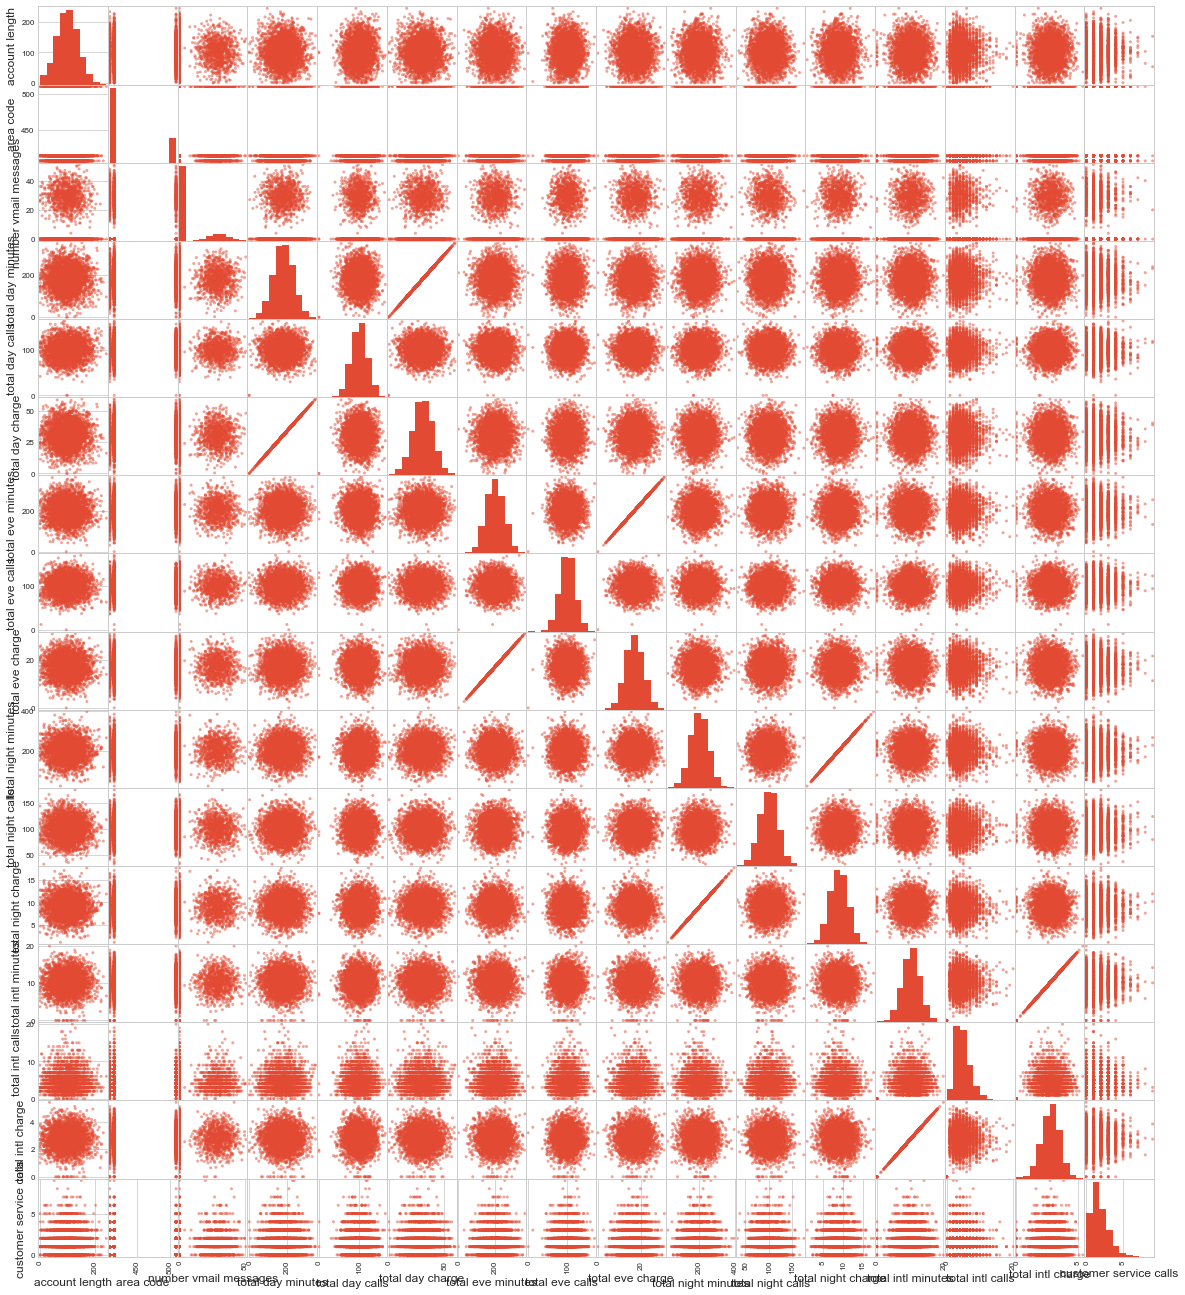

In [47]:
x_cols = ['account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 
          'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
          'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 
          'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 
          'total intl charge', 'customer service calls']

pd.plotting.scatter_matrix(df[x_cols], figsize=(20,23));


In [26]:
def print_results(headline, true_value, pred):
    print(headline)
    print('accuracy: {}'.format(accuracy_score(true_value, pred)))
    print('precision: {}'.format(precision_score(true_value, pred)))
    print('recall: {}'.format(recall_score(true_value, pred)))
    print('f1: {}'.format(f1_score(true_value, pred)))

In [38]:
# classifier to use     (can I use def to imput all 4 models here?)
classifier = RandomForestClassifier

# splitting data into trainning and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['churn'], random_state=2)

# building normal model
pipeline = make_pipeline(classifier(random_state=42))
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)

ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

# build model with undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(random_state=42), classifier(random_state=42))
nearmiss_model = nearmiss_pipeline.fit(X_train, y_train)
nearmiss_prediction = nearmiss_model.predict(X_test)

In [ ]:
# printing information about both models
print()
print('normal data distribution: {}'.format(Counter(df['target'])))
X-smote, y_smote = SMOTE().fit_sample(df['df'], df['target'])
print('SMOTE data distribution: {}'.format(Counter(y_smote)))
X_nearmiss, y_nearmiss = NearMiss().fitsample(df['df'], df['target'])
print('NearMiss data distribution: {}'.format(Counter(y_nearmiss)))

# Classification report
print(classification_report(y_test, prediction))
print(classification_report_imbalanced(y_test, smote_prediction))

print()
print('normal Pipeline Score {}'.format(pipeline.score(X_test, y_test)))
print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))
print('NearMiss Pipeline Score {}'.format(nearmiss_pipeline.score(X_test, y_test)))

print()
print_results('normal classification', y_test, prediction)
print()
print_results('SMOTE classification', y_test, smote_prediction)
print()
print_results('NearMiss classification', y_test, nearmiss_prediction)


In [ ]:
from sklearn.model_selection import KFold

# cross validation done right
kf = KFold(n_splits=5, random_state=42)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
for train, test in kf.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), classifier(random_state=42))
    model = pipeline.fit(X_train[train], y_train[train])
    prediction = model.predict(X_train[test])

    accuracy.append(pipeline.score(X_train[test], y_train[test]))
    precision.append(precision_score(y_train[test], prediction))
    recall.append(recall_score(y_train[test], prediction))
    f1.append(f1_score(y_train[test], prediction))
    auc.append(roc_auc_score(y_train[test], prediction))

print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))
print()

# cross validation done wrong
kf = KFold(n_splits=5, random_state=42)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
X, y = SMOTE().fit_sample(X_train, y_train)
for train, test in kf.split(X, y):
    pipeline = make_pipeline(classifier(random_state=42))
    model = pipeline.fit(X[train], y[train])
    prediction = model.predict(X[test])

    accuracy.append(pipeline.score(X[test], y[test]))
    precision.append(precision_score(y[test], prediction))
    recall.append(recall_score(y[test], prediction))
    f1.append(f1_score(y[test], prediction))

print("done wrong mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))